In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


# Read CSV file
df = pd.read_excel("allDHS.xlsx")





KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 

EDA

     year country  population
0    1986      LB        3215
1    1986      OS        2907
2    1986      SN        4287
3    1987      BU        3811
4    1987      ML        3358
..    ...     ...         ...
165  2022      KE       19530
166  2022      MZ        7786
167  2023      GH        1038
168  2023      MZ        1503
169  2023      SN       20996

[170 rows x 3 columns]
year
1986                                [LB, OS]
1987                            [BU, ML, OS]
1988                                [GH, KE]
1989                                    [KE]
1990                                    [NG]
1991                                    [CM]
1992            [BF, MD, MW, NI, NM, RW, SN]
1993                        [BF, GH, KE, SN]
1994                            [CF, CI, GH]
1995                                [CF, ML]
1996                        [BJ, KM, ML, TD]
1997                            [MD, MZ, TD]
1998                [BF, CI, CM, GH, KE, NI]
1999                    [B

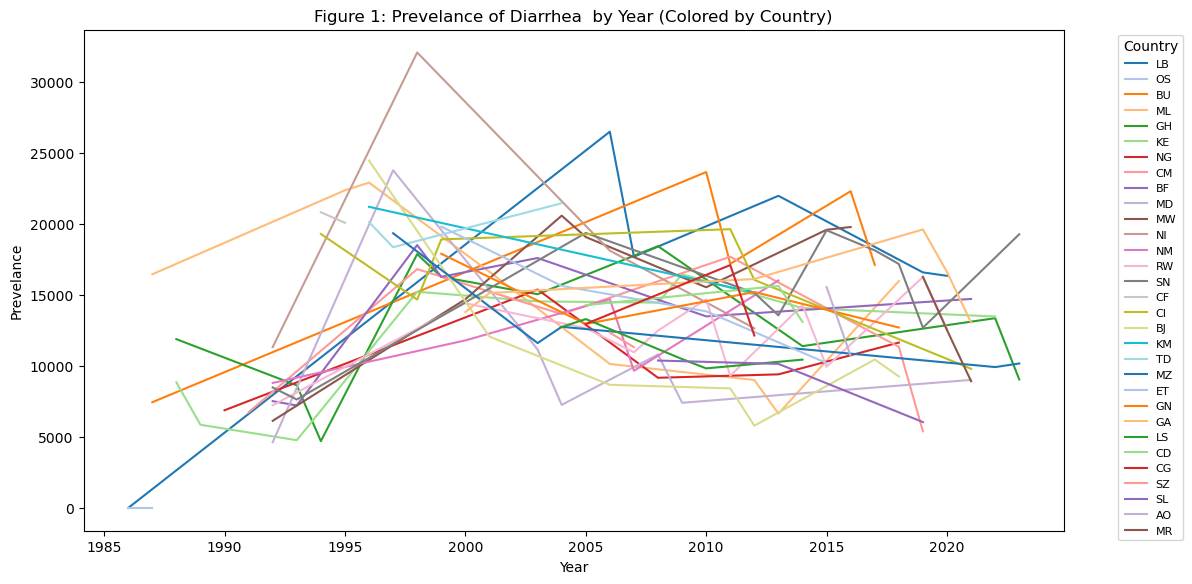

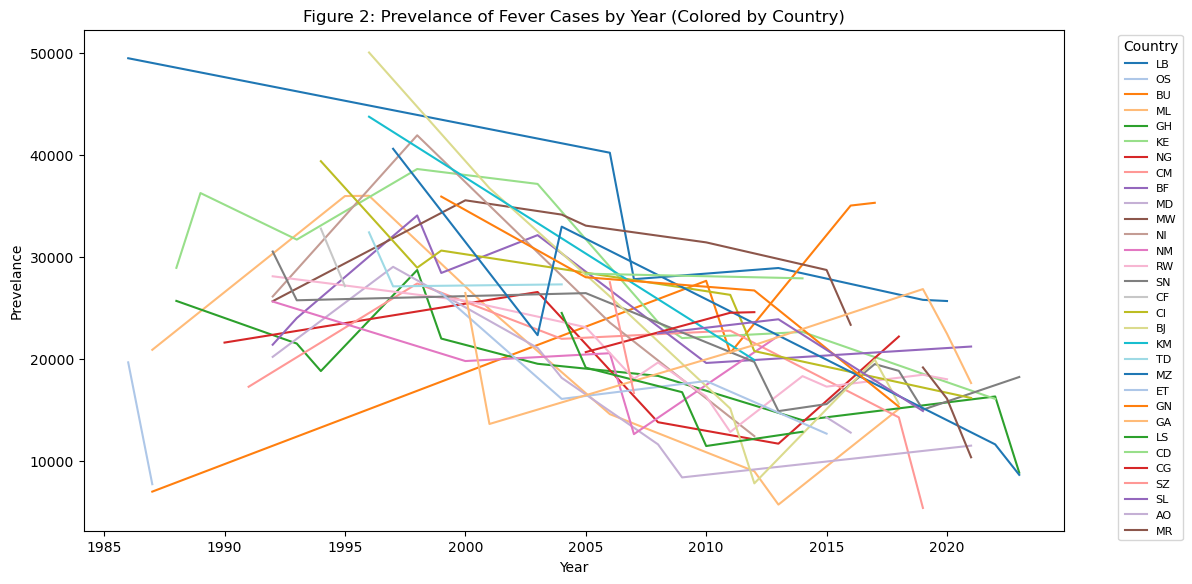

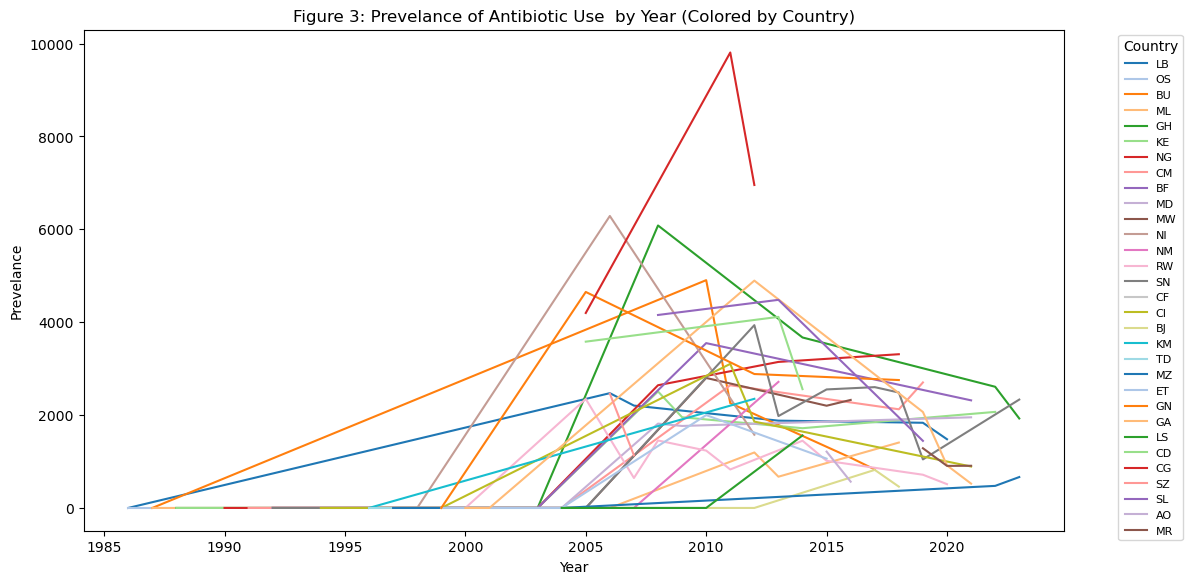

   country  population
22      NG       94892
28      SN       69663
13      KE       63540
20      MW       57391
18      ML       49027
26      RW       47017
2       BJ       46778
1       BF       43881
9       ET       38768
17      MD       35574
8       CM       30807
11      GH       28579
23      NI       28360
4       CD       24752
12      GN       23820
27      SL       23817
3       BU       22669
7       CI       21953
21      MZ       21335
15      LB       19527
10      GA       14971
24      NM       14902
0       AO       13447
6       CG       12926
19      MR       10972
30      TD       10773
16      LS        9482
14      KM        3954
25      OS        2805
5       CF        2494
29      SZ        2376
[2016 2015 1992 1993 1999 1998 2003 2010 2021 1996 2001 2006 2012 2011
 2018 2017 1987 2005 2014 2013 1994 1995 1991 2004 2019 2000 2020 1988
 2008 2022 2023 1989 2009 1986 2007 1997 1990]


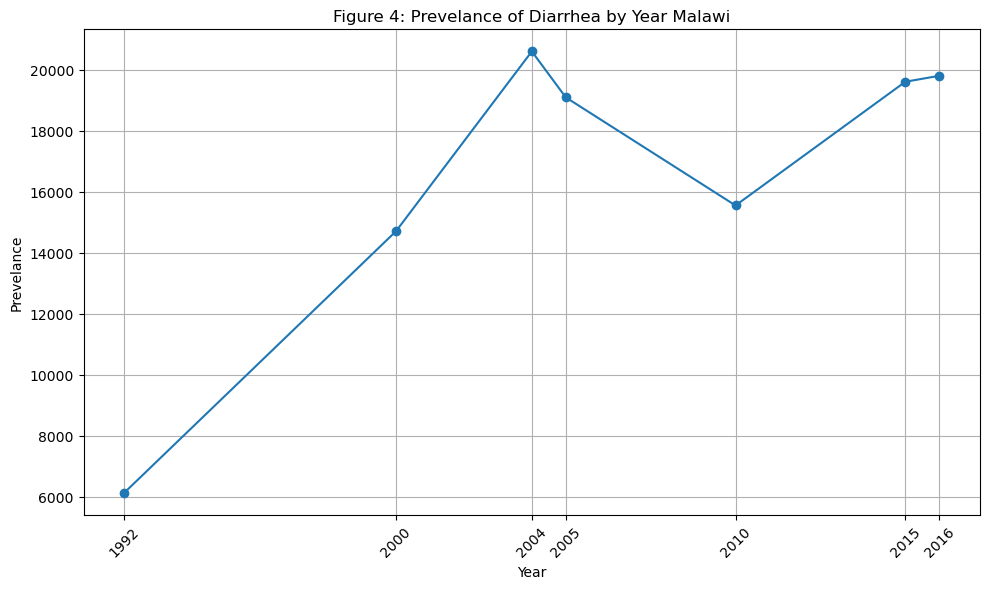

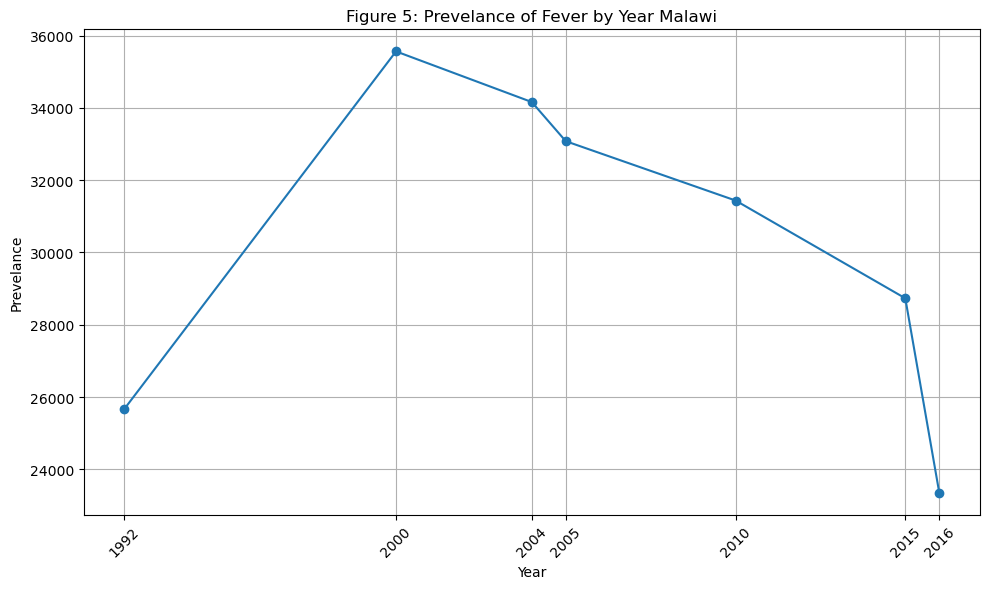

5


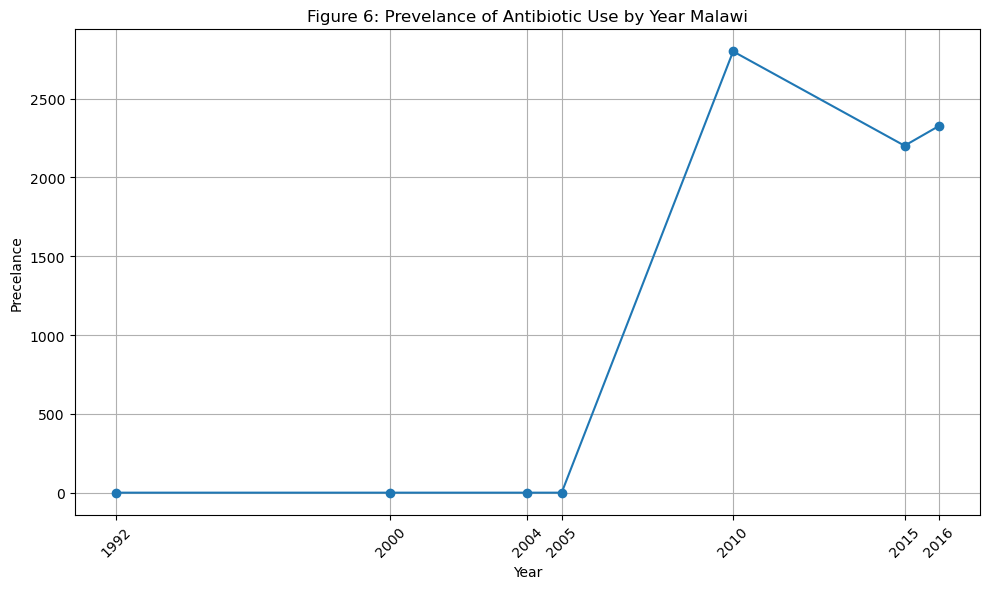

5
Index(['Unnamed: 0', 'survey.date', 'age.in.months', 'geog.loc', 'diarrhea',
       'fever', 'cough', 'measles.y', 'dpt1.y', 'dpt2.y', 'dpt3.y', 'polio0.y',
       'polio.y', 'polio2.y', 'polio3.y', 'rur.urb', 'long', 'lat', 'altitude',
       'weight', 'height', 'weight.kilos', 'birth.weight', 'highest.educ',
       'years.educ', 'no.children.less.5', 'relgion', 'ethnicity',
       'wealth.index', 'wealth.score', 'card.date.measles',
       'age.at.vac.measles', 'card.date.polio0', 'age.at.vac.polio0',
       'card.date.polio1', 'age.at.vac.polio1', 'card.date.polio2',
       'age.at.vac.polio2', 'children.under.five.bednet', 'bednet',
       'region.residence', 'given.antibiotics', 'given.antibiotics.injection',
       'given.antibiotics.fever', 'given.antibiotics.injection.fever',
       'given.antibiotics.cough', 'given.antibiotics.cough.syrup',
       'given.antibiotics.cough.injection', 'country.code', 'sex', 'caesarian',
       'months.breastfed', 'given.oral.rehyd', 'given.PP

In [ ]:
population_by_year_country = df.groupby(['year', 'country']).size().reset_index(name='population')
print(population_by_year_country)

yearly_cases_main1 = df.groupby(['year', 'country'], as_index=False)['diarrhea'].sum(min_count=1)


df = df.dropna(subset=['diarrhea'])
df = df.dropna(subset=['fever'])

countries_by_year = df.groupby('year')['country'].unique()
print(countries_by_year)



yearly_cases_main = df.groupby(['year', 'country'])['diarrhea'].sum().reset_index()

merged_df = yearly_cases_main.merge(population_by_year_country, on=['year', 'country'])
merged_df['diarrhea_per_100k'] = (merged_df['diarrhea'] / merged_df['population']) * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='diarrhea_per_100k', hue='country', palette='tab20')
plt.title('Figure 1: Prevelance of Diarrhea  by Year (Colored by Country)')
plt.xlabel('Year')
plt.ylabel('Prevelance')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

yearly_cases_main2 = df.groupby(['year', 'country'])['fever'].sum().reset_index()

merged_df1 = yearly_cases_main2.merge(population_by_year_country, on=['year', 'country'])
merged_df1['fever_per_100k'] = (merged_df1['fever'] / merged_df1['population']) * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df1, x='year', y='fever_per_100k', hue='country', palette='tab20')
plt.title('Figure 2: Prevelance of Fever Cases by Year (Colored by Country)')
plt.xlabel('Year')
plt.ylabel('Prevelance')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


yearly_cases_main3 = df.groupby(['year', 'country'])['given.antibiotics'].sum().reset_index()

merged_df2 = yearly_cases_main3.merge(population_by_year_country, on=['year', 'country'])
merged_df2['abuse_per_100k'] = (merged_df2['given.antibiotics'] / merged_df1['population']) * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df2, x='year', y='abuse_per_100k', hue='country', palette='tab20')
plt.title('Figure 3: Prevelance of Antibiotic Use  by Year (Colored by Country)')
plt.xlabel('Year')
plt.ylabel('Prevelance')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()



population_by_country = df.groupby(['country']).size().reset_index(name='population').sort_values(by='population', ascending=False)
print(population_by_country)
print(df["year"].unique())

filtered_df = merged_df[(merged_df["country"] == "MW")]
yearly_cases = filtered_df.groupby('year')['diarrhea_per_100k'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_cases['year'], yearly_cases['diarrhea_per_100k'], marker='o', linestyle='-')
plt.title('Figure 4: Prevelance of Diarrhea by Year Malawi')
plt.xlabel('Year')
plt.ylabel('Prevelance')
plt.grid(True)
plt.xticks(yearly_cases['year'], rotation=45)
plt.tight_layout()
plt.show()


filtered_df1 = merged_df1[(merged_df1["country"] == "MW")]
yearly_cases2 = filtered_df1.groupby('year')['fever_per_100k'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_cases2['year'], yearly_cases2['fever_per_100k'], marker='o', linestyle='-')
plt.title('Figure 5: Prevelance of Fever by Year Malawi')
plt.xlabel('Year')
plt.ylabel('Prevelance')
plt.grid(True)
plt.xticks(yearly_cases2['year'], rotation=45)
plt.tight_layout()
plt.show()
print(len(filtered_df.columns))

filtered_df2 = merged_df2[(merged_df2["country"] == "MW")]
yearly_cases3 = filtered_df2.groupby('year')['abuse_per_100k'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(yearly_cases3['year'], yearly_cases3['abuse_per_100k'], marker='o', linestyle='-')
plt.title('Figure 6: Prevelance of Antibiotic Use by Year Malawi')
plt.xlabel('Year')
plt.ylabel('Precelance')
plt.grid(True)
plt.xticks(yearly_cases2['year'], rotation=45)
plt.tight_layout()
plt.show()
print(len(filtered_df.columns))

print(df.columns)





/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features: Index(['age.in.months', 'dpt1.y', 'dpt2.y', 'months.breastfed',
       'region.residence_central region', 'region.residence_south',
       'region_central region', 'region_north', 'region_northern',
       'region_south'],
      dtype='object')
Feature importance based on absolute logistic regression coefficients:
age.in.months                      0.838364
region.residence_south             0.401005
region.residence_central region    0.327808
region_south                       0.294087
months.breastfed                   0.256792
region_central region              0.255722
dpt2.y                             0.196795
region_northern                    0.169352
dpt1.y                             0.106252
region_north                       0.095641
dtype: float64


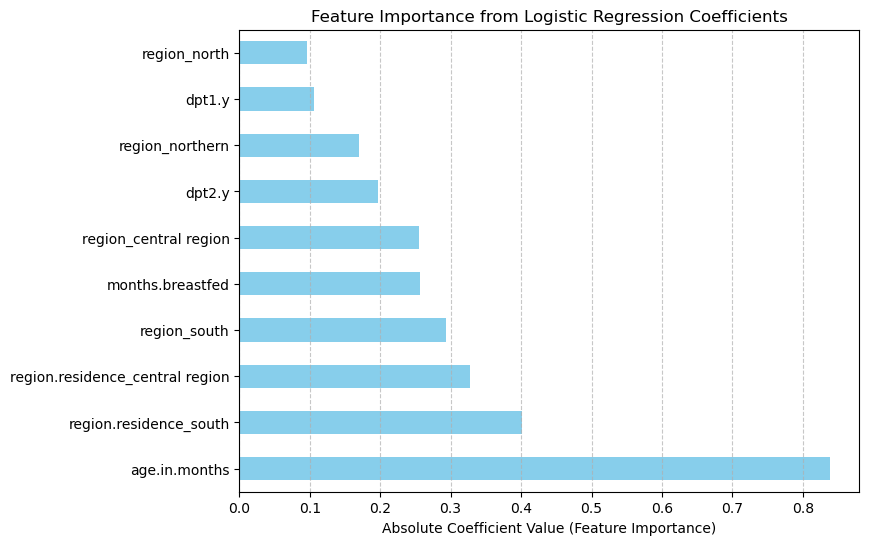

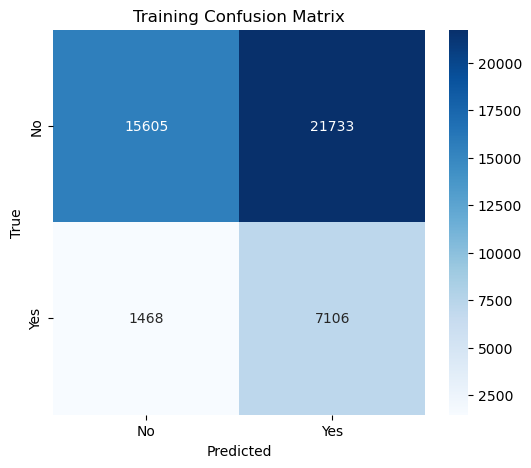

The selected features are: Index(['age.in.months', 'dpt1.y', 'dpt2.y', 'months.breastfed',
       'region.residence_central region', 'region.residence_south',
       'region_central region', 'region_north', 'region_northern',
       'region_south'],
      dtype='object')


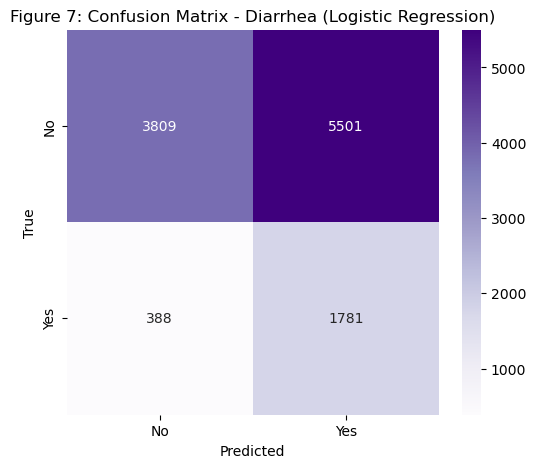

F1 Score - Diarrhea (Logistic Regression): 0.377
Selected features: Index(['age.in.months', 'dpt1.y', 'rur.urb', 'months.breastfed',
       'region.residence_central region', 'region.residence_northern',
       'region.residence_northern region', 'region.residence_southern region',
       'region_southern', 'region_southern region'],
      dtype='object')
Feature importance based on absolute logistic regression coefficients:
age.in.months                       0.372607
months.breastfed                    0.175283
region.residence_northern           0.171064
dpt1.y                              0.151004
region.residence_northern region    0.125710
region.residence_central region     0.121827
rur.urb                             0.120415
region_southern                     0.115037
region_southern region              0.107613
region.residence_southern region    0.059094
dtype: float64


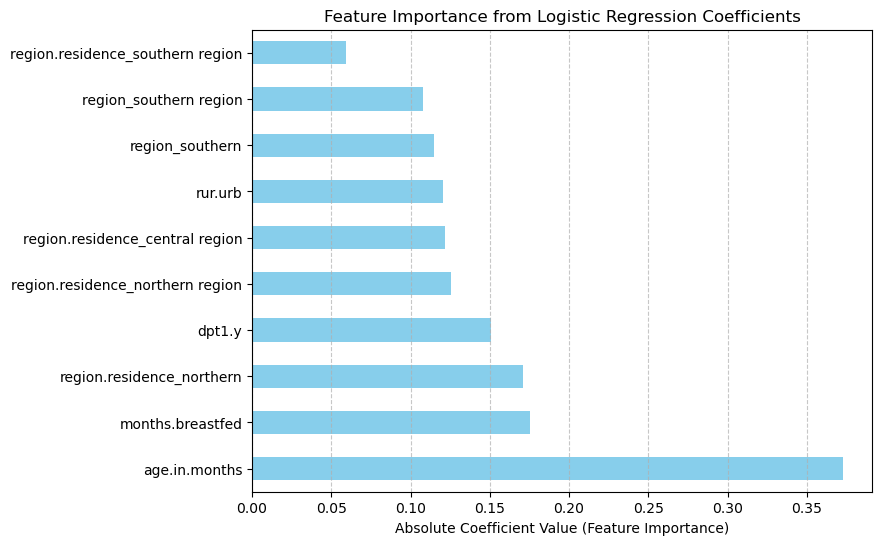

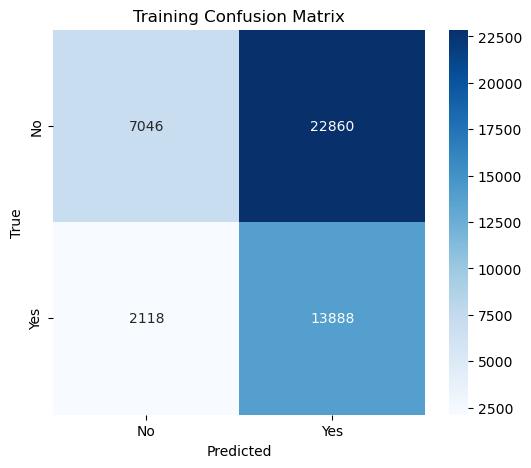

The selected features are: Index(['age.in.months', 'dpt1.y', 'rur.urb', 'months.breastfed',
       'region.residence_central region', 'region.residence_northern',
       'region.residence_northern region', 'region.residence_southern region',
       'region_southern', 'region_southern region'],
      dtype='object')


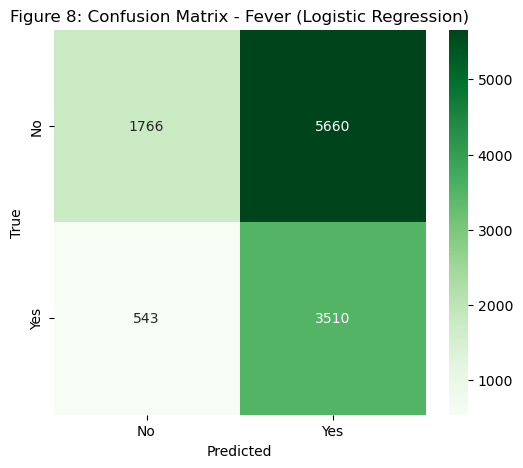

F1 Score - Fever (Logistic Regression): 0.531


In [ ]:
filtered_df1 = df[(df["country"] == "MW")]

filtered_df1 = filtered_df1.dropna(subset=['diarrhea', 'fever'])

# Set up features
X = filtered_df1.drop(columns=[
    'Unnamed: 0','survey.date', 'diarrhea', 'fever',
    'year', 'country.code', 'country',
    'given.antibiotics','given.antibiotics.injection',
    'given.antibiotics.fever',	'given.antibiotics.injection.fever',
    'given.antibiotics.cough', 'given.antibiotics.cough.syrup',	
    'given.antibiotics.cough.injection', 'given.oral.rehyd', 'given.PP.oral.rehyd',
    'cough'
])

X = pd.get_dummies(X, drop_first=True)

# Impute missing values + drop columns entirely NULL
X = X.dropna(axis=1, how='all')  
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed_array, columns=X.columns)

# Target 
y = filtered_df1["diarrhea"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def select_features_logreg(X_train, y_train, X_test, n_features_to_select=10):
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply RFE with Logistic Regression as the estimator
    log_reg = LogisticRegression(random_state=42, class_weight='balanced')
    selector = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)
    
    # Fit the RFE selector to the training data
    selector.fit(X_train_scaled, y_train)
    
    # Get the selected features
    selected_features = X_train.columns[selector.support_]
    print("Selected features:", selected_features)
    
    # Get transformed data for both train and test sets
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    # Train Logistic Regression model on the selected features
    model = LogisticRegression(random_state=42, class_weight='balanced')
    model.fit(X_train_selected, y_train)

    coef = model.coef_[0]  
    feature_importance = pd.Series(coef, index=selected_features)

    feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

    print("Feature importance based on absolute logistic regression coefficients:")
    print(feature_importance_sorted)
    
    plt.figure(figsize=(8, 6))
    feature_importance_sorted.plot(kind='barh', color='skyblue')
    plt.xlabel('Absolute Coefficient Value (Feature Importance)')
    plt.title('Feature Importance from Logistic Regression Coefficients')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Make predictions on the test data
    y_probs = model.predict_proba(X_test_selected)[:, 1]
    y_pred = (y_probs >= 0.4).astype(int)

    # Make predictions on the training data
    y_train_probs = model.predict_proba(X_train_selected)[:, 1]
    y_train_pred = (y_train_probs >= 0.4).astype(int)
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Plot training confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Training Confusion Matrix')
    plt.show()

    return y_pred, X_test_selected, selected_features

#Diarrhea 
y_pred_log, X_test_selected_log, selected_features = select_features_logreg(X_train, y_train, X_test)

# Print selected features
print("selected features:", selected_features)

# Test Confusion matrix 
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 7: Confusion Matrix - Diarrhea (Logistic Regression)')
plt.show()

# F1 score
f1_dia = f1_score(y_test, y_pred_log)
print("F1 Score - Diarrhea (Logistic Regression):", round(f1_dia, 3))


#Fever
y = filtered_df1["fever"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_pred_log, X_test_selected_log, selected_features = select_features_logreg(X_train, y_train, X_test)

print("selected features:", selected_features)

# Test Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 8: Confusion Matrix - Fever (Logistic Regression)')
plt.show()

f1_fever = f1_score(y_test, y_pred_log)
print("F1 Score - Fever (Logistic Regression):", round(f1_fever, 3))



/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


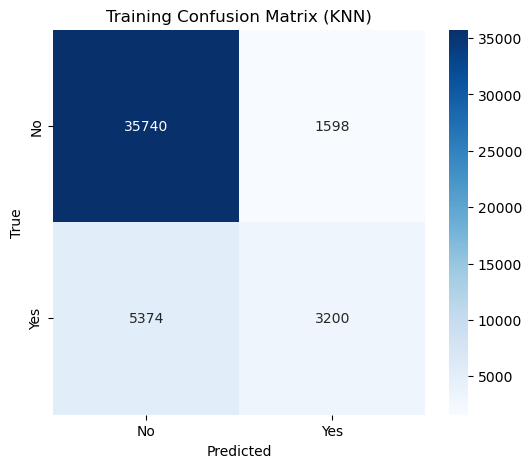

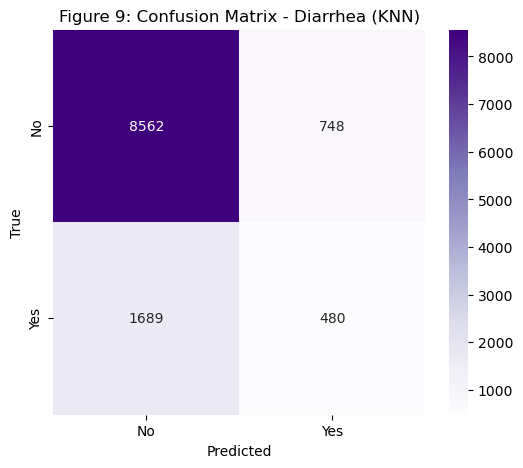

F1 Score - Diarrhea (KNN): 0.283


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


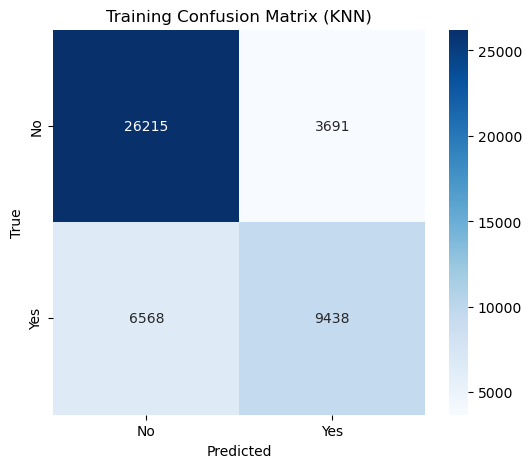

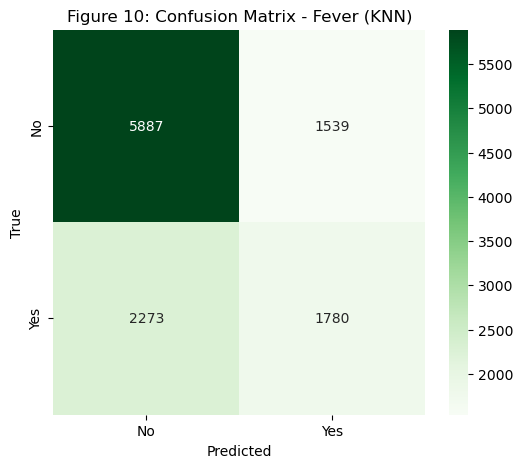

F1 Score - Fever (KNN): 0.483


In [ ]:
#KNN 
def select_features_knn(X_train, y_train, X_test, return_train_preds=False, k=20):
    # Variance threshold to remove low-variance features
    vt = VarianceThreshold(threshold=0.01)
    X_vt_train = vt.fit_transform(X_train)
    X_vt_test = vt.transform(X_test)

    # Select top features 
    selector = SelectKBest(f_classif, k=k)
    X_selected_train = selector.fit_transform(X_vt_train, y_train)
    X_selected_test = selector.transform(X_vt_test)

    # KNN model 
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
    knn.fit(X_selected_train, y_train)

    if return_train_preds:
        y_train_pred = knn.predict(X_selected_train)
        cm_train = confusion_matrix(y_train, y_train_pred)
        
        # confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Training Confusion Matrix (KNN)')
        plt.show()

    return knn, X_selected_test

#Diarrhea
df_dia = filtered_df1.dropna(subset=['diarrhea'])

X_dia = df_dia.drop(columns=['diarrhea'])
X_dia = X_dia.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_dia = pd.get_dummies(X_dia, drop_first=True)
y_dia = df_dia['diarrhea']

imputer = SimpleImputer(strategy='mean')
X_dia_imputed = imputer.fit_transform(X_dia)

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_dia_imputed, y_dia, test_size=0.2, random_state=42
)

knn_dia, X_test_selected_dia = select_features_knn(
    X_train_dia, y_train_dia, X_test_dia, return_train_preds=True
)

y_pred_dia = knn_dia.predict(X_test_selected_dia)
cm_dia = confusion_matrix(y_test_dia, y_pred_dia)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dia, annot=True, fmt="d", cmap="Purples", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 9: Confusion Matrix - Diarrhea (KNN)')
plt.show()

f1_dia_knn = f1_score(y_test_dia, y_pred_dia)
print("F1 Score - Diarrhea (KNN):", round(f1_dia_knn, 3))


#Fever
df_fever = filtered_df1.dropna(subset=['fever'])

X_fever = df_fever.drop(columns=['fever'])
X_fever = X_fever.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_fever = pd.get_dummies(X_fever, drop_first=True)
y_fever = df_fever['fever']

X_fever_imputed = imputer.fit_transform(X_fever)

X_train_fever, X_test_fever, y_train_fever, y_test_fever = train_test_split(
    X_fever_imputed, y_fever, test_size=0.2, random_state=42
)

knn_fever, X_test_selected_fever = select_features_knn(
    X_train_fever, y_train_fever, X_test_fever, return_train_preds=True
)

y_pred_fever = knn_fever.predict(X_test_selected_fever)
cm_fever = confusion_matrix(y_test_fever, y_pred_fever)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_fever, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 10: Confusion Matrix - Fever (KNN)')
plt.show()

f1_fever_knn = f1_score(y_test_fever, y_pred_fever)
print("F1 Score - Fever (KNN):", round(f1_fever_knn, 3))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


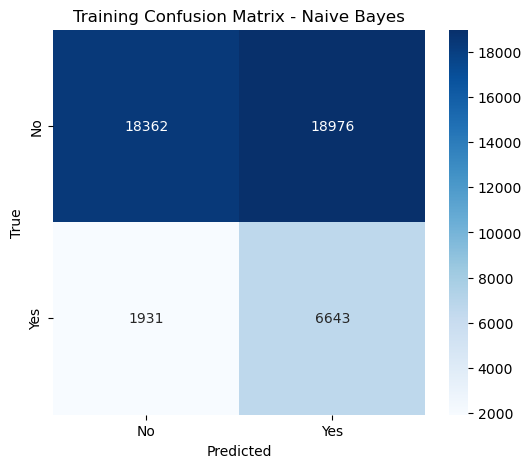

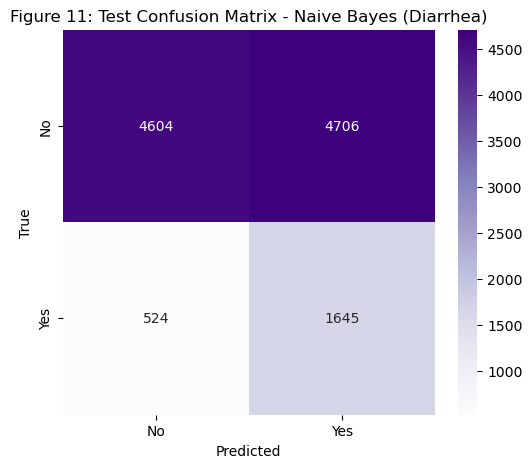

Sensitivity (Recall) for Diarrhea: 0.7584140156754264


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['given.antibiotics.cough' 'given.antibiotics.cough.syrup'
 'given.antibiotics.cough.injection']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


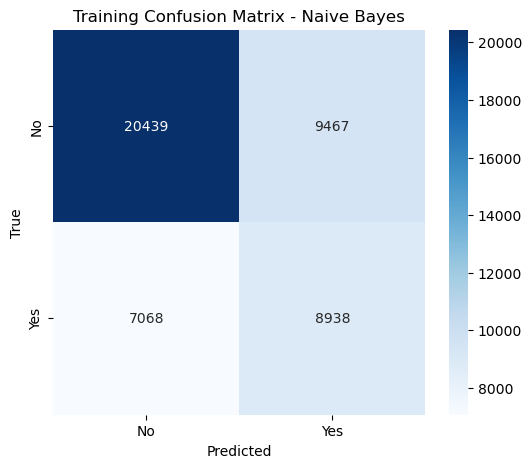

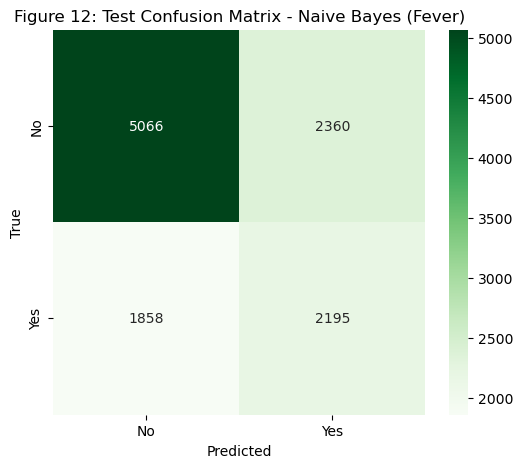

Sensitivity (Recall) for Fever: 0.541574142610412


In [ ]:
# Naive Bayes 
def select_features_nb(X_train, y_train, X_test, return_train_preds=False, threshold=0.5, k=10):

    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Feature selection
    selector = SelectKBest(f_classif, k=k)
    X_selected_train = selector.fit_transform(X_train, y_train)
    X_selected_test = selector.transform(X_test)

    # Naive Bayes model
    nb = GaussianNB()
    nb.fit(X_selected_train, y_train)

    if return_train_preds:
        y_train_probs = nb.predict_proba(X_selected_train)[:, 1]
        y_train_pred = (y_train_probs >= threshold).astype(int)
        cm_train = confusion_matrix(y_train, y_train_pred)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Training Confusion Matrix - Naive Bayes')
        plt.show()

    return nb, X_selected_test

#Diarrhea
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)
nb_dia, X_selected_test_dia = select_features_nb(X_train_dia, y_train_dia, X_test_dia, return_train_preds=True, threshold=0.4)

y_probs_dia = nb_dia.predict_proba(X_selected_test_dia)[:, 1]
y_pred_nb_dia = (y_probs_dia >= 0.4).astype(int)
cm_dia = confusion_matrix(y_test_dia, y_pred_nb_dia)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dia, annot=True, fmt="d", cmap="Purples", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 11: Test Confusion Matrix - Naive Bayes (Diarrhea)')
plt.show()

print("Recall for Diarrhea:", cm_dia[1,1] / (cm_dia[1,1] + cm_dia[1,0]))

#Fever 
X_train_fever, X_test_fever, y_train_fever, y_test_fever = train_test_split(X_fever, y_fever, test_size=0.2, random_state=42)
nb_fever, X_selected_test_fever = select_features_nb(X_train_fever, y_train_fever, X_test_fever, return_train_preds=True, threshold=0.35)

y_probs_fever = nb_fever.predict_proba(X_selected_test_fever)[:, 1]
y_pred_nb_fever = (y_probs_fever >= 0.35).astype(int)
cm_fever = confusion_matrix(y_test_fever, y_pred_nb_fever)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_fever, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 12: Test Confusion Matrix - Naive Bayes (Fever)')
plt.show()

print("Recall for Fever:", cm_fever[1,1] / (cm_fever[1,1] + cm_fever[1,0]))


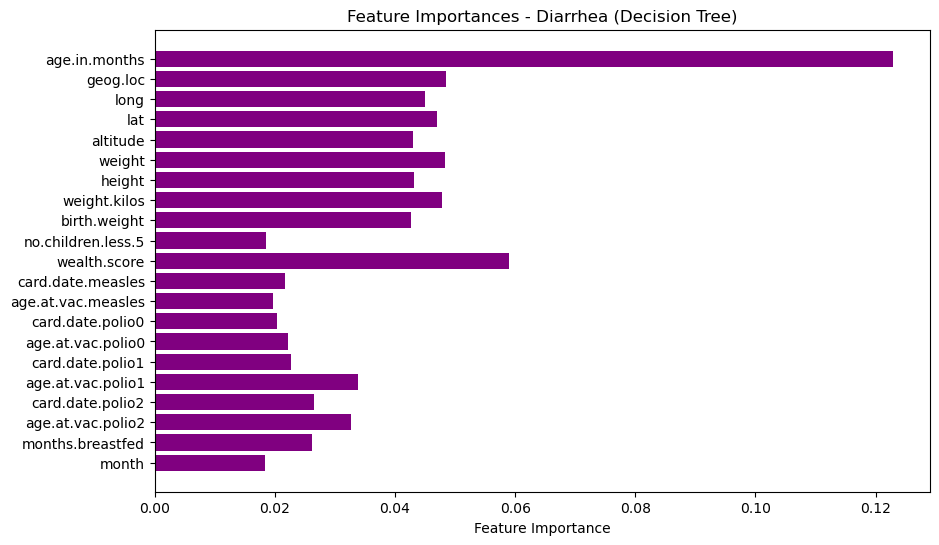

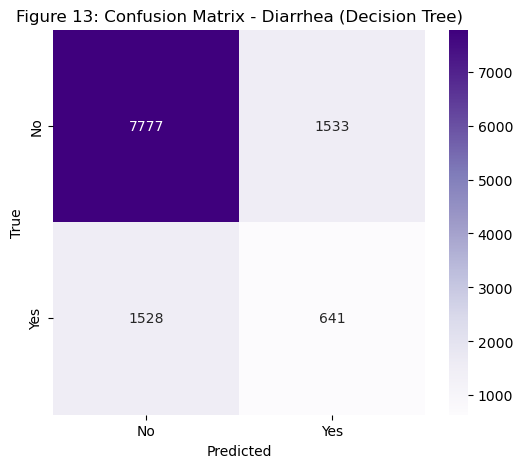

F1 score for Diarrhea (test): 0.295


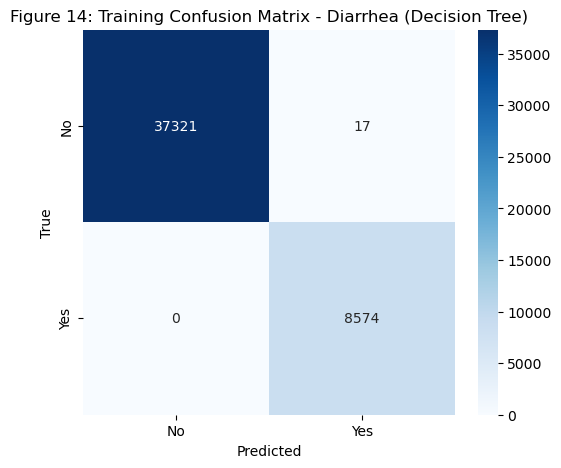

F1 score for Diarrhea (training): 0.999


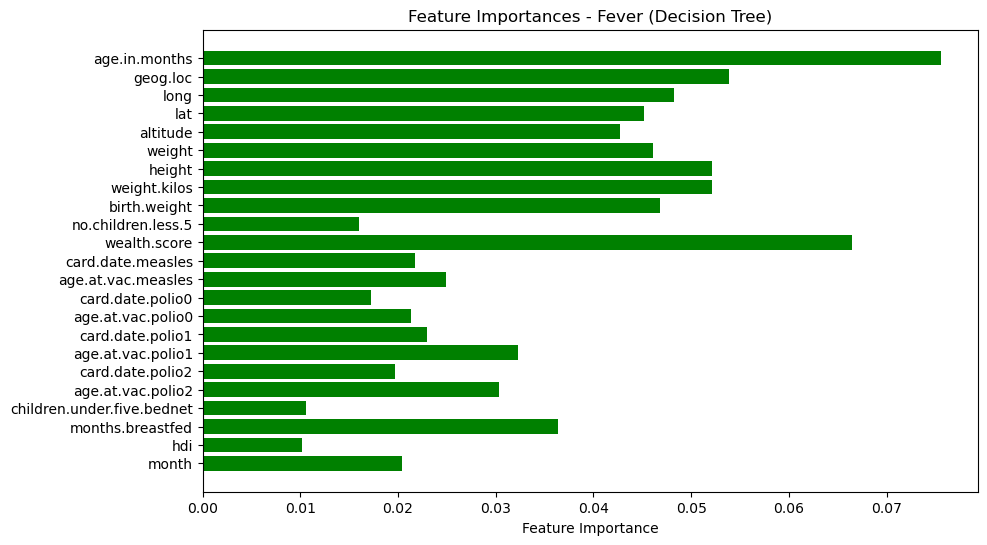

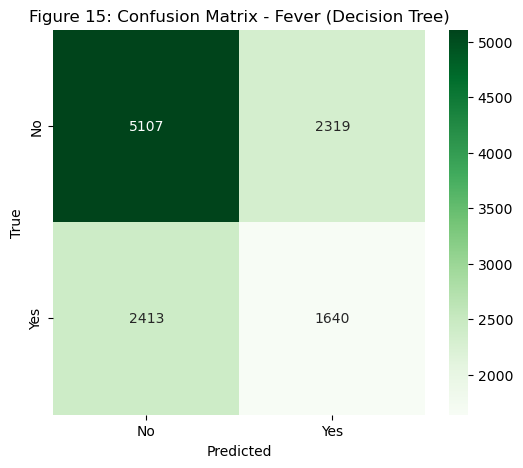

F1 score for Fever (test): 0.409


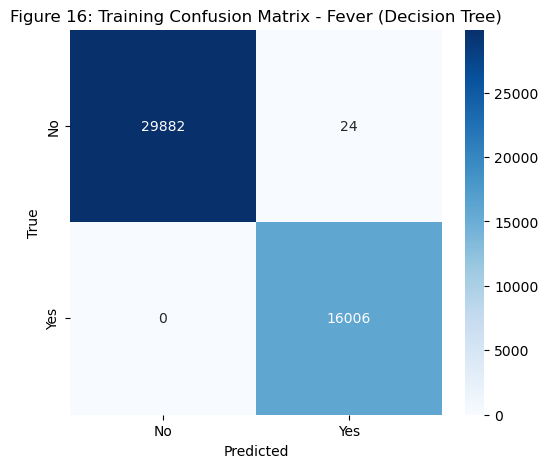

F1 score for Fever (training): 0.999


In [ ]:
# Decision Tree 
def select_features_dt(X_train, y_train, X_test, threshold=0.01):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)

    importances = dt.feature_importances_
    selected_features = importances > threshold

    X_selected_train = X_train[:, selected_features]
    X_selected_test = X_test[:, selected_features]

    final_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    final_dt.fit(X_selected_train, y_train)

    return X_selected_train, X_selected_test, final_dt, selected_features, importances

# Assigning different variable names for easier coding
X_dia = X
X_dia = X_dia.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_dia = pd.get_dummies(X_dia, drop_first=True)
y_dia = df_dia['diarrhea']

imputer = SimpleImputer(strategy='mean')
X_dia_imputed = imputer.fit_transform(X_dia)

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_dia_imputed, y_dia, test_size=0.2, random_state=42
)

X_selected_train_dia, X_selected_test_dia, final_dt_dia, selected_features_dia, importances_dia = select_features_dt(
    X_train_dia, y_train_dia, X_test_dia
)

#feature importances
feature_names_dia = X_dia.columns[selected_features_dia]
plt.figure(figsize=(10, 6))
plt.barh(feature_names_dia, importances_dia[selected_features_dia], color='purple')
plt.xlabel("Feature Importance")
plt.title("Feature Importances - Diarrhea (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

y_pred_dia = final_dt_dia.predict(X_selected_test_dia)
cm_dia = confusion_matrix(y_test_dia, y_pred_dia)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dia, annot=True, fmt="d", cmap="Purples", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 13: Confusion Matrix - Diarrhea (Decision Tree)')
plt.show()

f1_dia = f1_score(y_test_dia, y_pred_dia)
print("F1 score for Diarrhea (test):", round(f1_dia, 3))

y_train_pred_dia = final_dt_dia.predict(X_selected_train_dia)
cm_train_dia = confusion_matrix(y_train_dia, y_train_pred_dia)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train_dia, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 14: Training Confusion Matrix - Diarrhea (Decision Tree)')
plt.show()

f1_train_dia = f1_score(y_train_dia, y_train_pred_dia)
print("F1 score for Diarrhea (training):", round(f1_train_dia, 3))


#Fever
X_fever = X
X_fever = X_fever.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_fever = pd.get_dummies(X_fever, drop_first=True)
y_fever = df_fever['fever']

X_fever_imputed = imputer.fit_transform(X_fever)

X_train_fever, X_test_fever, y_train_fever, y_test_fever = train_test_split(
    X_fever_imputed, y_fever, test_size=0.2, random_state=42
)

X_selected_train_fever, X_selected_test_fever, final_dt_fever, selected_features_fever, importances_fever = select_features_dt(
    X_train_fever, y_train_fever, X_test_fever
)

feature_names_fever = X_fever.columns[selected_features_fever]
plt.figure(figsize=(10, 6))
plt.barh(feature_names_fever, importances_fever[selected_features_fever], color='green')
plt.xlabel("Feature Importance")
plt.title("Feature Importances - Fever (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

y_pred_fever = final_dt_fever.predict(X_selected_test_fever)
cm_fever = confusion_matrix(y_test_fever, y_pred_fever)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_fever, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 15: Confusion Matrix - Fever (Decision Tree)')
plt.show()

f1_fever = f1_score(y_test_fever, y_pred_fever)
print("F1 score for Fever (test):", round(f1_fever, 3))

# Training Confusion Matrix and f1
y_train_pred_fever = final_dt_fever.predict(X_selected_train_fever)
cm_train_fever = confusion_matrix(y_train_fever, y_train_pred_fever)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train_fever, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 16: Training Confusion Matrix - Fever (Decision Tree)')
plt.show()

f1_train_fever = f1_score(y_train_fever, y_train_pred_fever)
print("F1 score for Fever (training):", round(f1_train_fever, 3))


Selected features (Random Forest + RFE):
['age.in.months', 'geog.loc', 'weight', 'wealth.score', 'card.date.polio2']

Selected Features for Diarrhea:
Index(['age.in.months', 'geog.loc', 'weight', 'wealth.score',
       'card.date.polio2'],
      dtype='object')


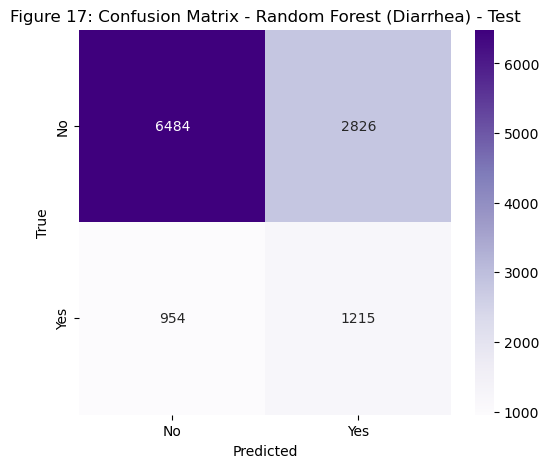

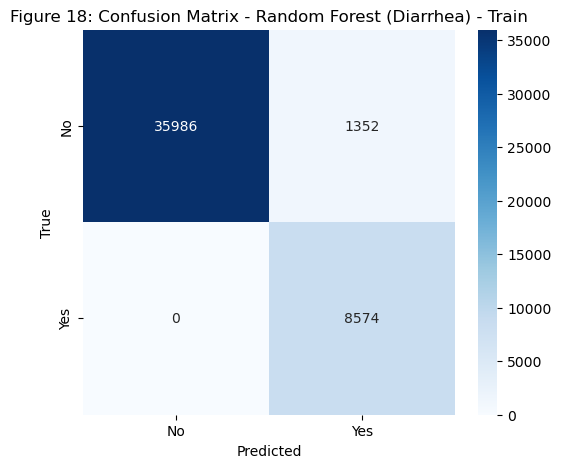

Recall for Diarrhea (Test): 0.5601659751037344
Recall for Diarrhea (Train): 1.0
F1 Score for Diarrhea (Test): 0.3913
F1 Score for Diarrhea (Train): 0.9269


/var/folders/09/rv9yrl890g1f71hjs8tj1xph0000gn/T/ipykernel_58021/3023255369.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


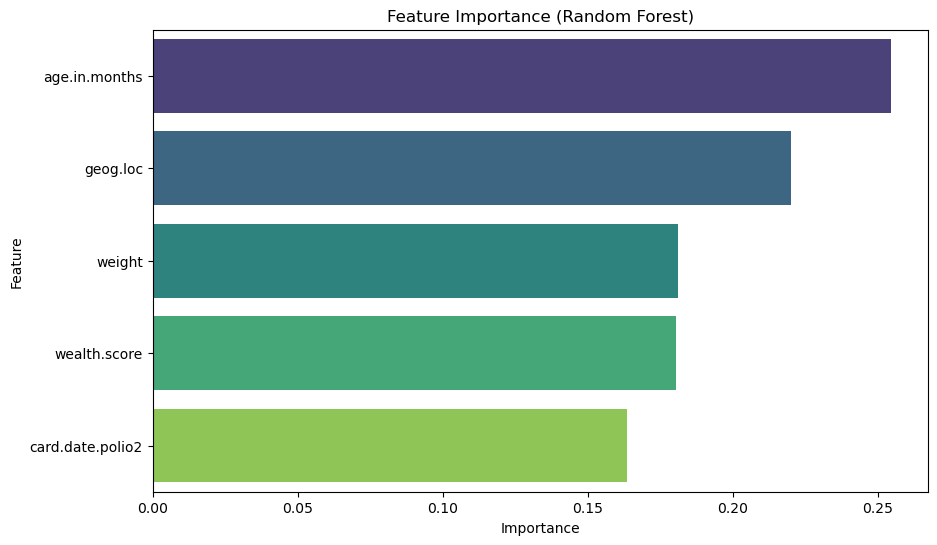

Selected features (Random Forest + RFE):
['age.in.months', 'geog.loc', 'lat', 'weight.kilos', 'wealth.score']

Selected Features for Fever:
Index(['age.in.months', 'geog.loc', 'lat', 'weight.kilos', 'wealth.score'], dtype='object')


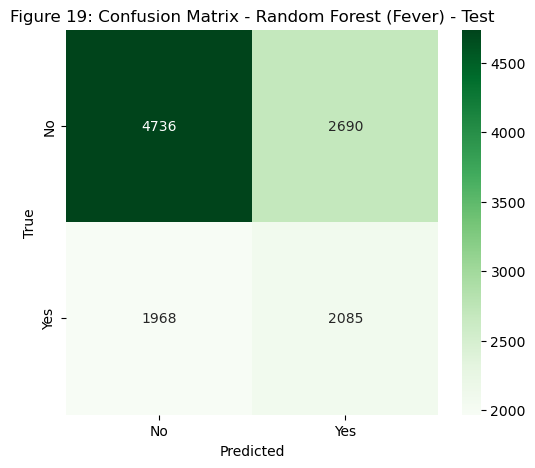

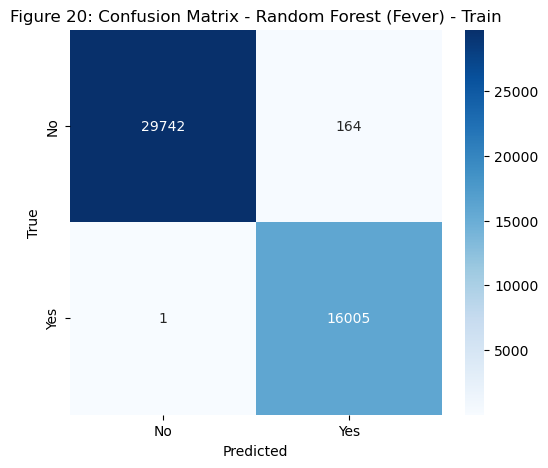

Recall for Fever (Test) is 0.5144337527757217
Recall for Fever (Train) is 0.9999375234287142
The F1 Score for Fever (Test) is 0.4724
The F1 Score for Fever (Train) is 0.9949


/var/folders/09/rv9yrl890g1f71hjs8tj1xph0000gn/T/ipykernel_58021/3023255369.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


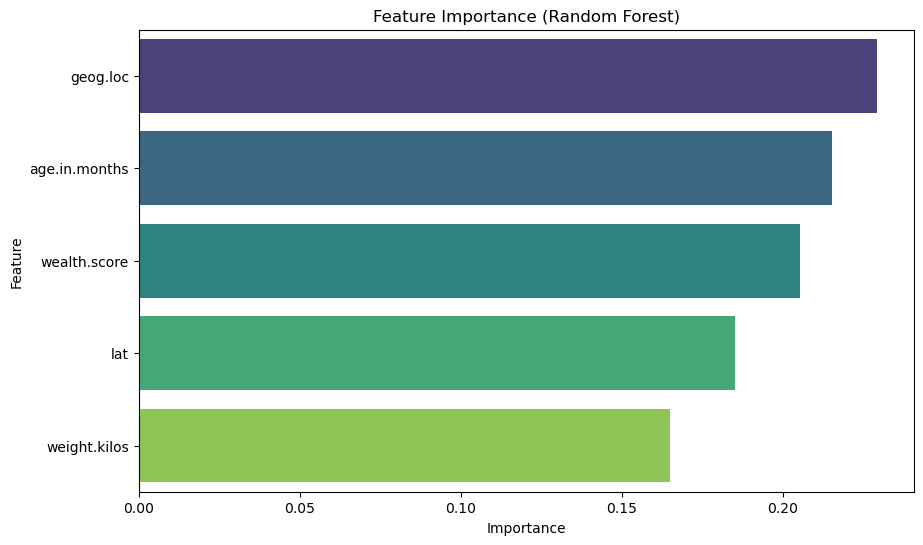

In [84]:
# Random Forest 
def select_features_rf(X_train, y_train, X_test, n_features_to_select=5):
    #  RFE
    rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50)
    rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    # Get selected feature names
    selected_feature_names = X_train.columns[rfe.support_]

    X_selected_train = rfe.transform(X_train)
    X_selected_test = rfe.transform(X_test)

    # Fit the final model on  selected features
    final_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50)
    final_rf.fit(X_selected_train, y_train)

    print("Selected features (Random Forest + RFE):")
    print(selected_feature_names.tolist())

    return X_selected_test, final_rf, selected_feature_names, X_selected_train


# plot feature importance
def plot_feature_importance(model, selected_features):
    # Get the feature importances from the trained model
    feature_importances = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    })

    # Sort 
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


#Diarrhea 

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

X_selected_test_dia, final_rf_dia, selected_features_dia, X_selected_train_dia = select_features_rf(X_train_dia, y_train_dia, X_test_dia)

print("\nSelected Features for Diarrhea:")
print(selected_features_dia)

# CM(Test set)
y_probs = final_rf_dia.predict_proba(X_selected_test_dia)[:, 1] 
y_pred_rf_dia = (y_probs > 0.2).astype(int)
cm_dia = confusion_matrix(y_test_dia, y_pred_rf_dia)

# CM (Training set)
y_train_probs = final_rf_dia.predict_proba(X_selected_train_dia)[:, 1]
y_train_pred_rf_dia = (y_train_probs > 0.2).astype(int)
cm_train_dia = confusion_matrix(y_train_dia, y_train_pred_rf_dia)

# CM(Test set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dia, annot=True, fmt="d", cmap="Purples", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 17: Confusion Matrix - Random Forest (Diarrhea) - Test')
plt.show()

# CM (Training set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train_dia, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 18: Confusion Matrix - Random Forest (Diarrhea) - Train')
plt.show()

print("Recall for Diarrhea (Test):", cm_dia[1, 1] / (cm_dia[1, 1] + cm_dia[1, 0]))
print("Recall for Diarrhea (Train):", cm_train_dia[1, 1] / (cm_train_dia[1, 1] + cm_train_dia[1, 0]))

precision_dia = cm_dia[1, 1] / (cm_dia[1, 1] + cm_dia[0, 1])
recall_dia = cm_dia[1, 1] / (cm_dia[1, 1] + cm_dia[1, 0])  
f1_dia = 2 * (precision_dia * recall_dia) / (precision_dia + recall_dia)

precision_train_dia = cm_train_dia[1, 1] / (cm_train_dia[1, 1] + cm_train_dia[0, 1])
recall_train_dia = cm_train_dia[1, 1] / (cm_train_dia[1, 1] + cm_train_dia[1, 0])
f1_train_dia = 2 * (precision_train_dia * recall_train_dia) / (precision_train_dia + recall_train_dia)

print(f"F1 Score for Diarrhea (Test): {f1_dia:.4f}")
print(f"F1 Score for Diarrhea (Train): {f1_train_dia:.4f}")

plot_feature_importance(final_rf_dia, selected_features_dia)


# fever

X_train_fever, X_test_fever, y_train_fever, y_test_fever = train_test_split(X_fever, y_fever, test_size=0.2, random_state=42)
X_selected_test_fever, final_rf_fever, selected_features_fever, X_selected_train_fever = select_features_rf(X_train_fever, y_train_fever, X_test_fever)

print("\nSelected Features for Fever:")
print(selected_features_fever)

# CM Fever predictions (Test set)
y_probs = final_rf_fever.predict_proba(X_selected_test_fever)[:, 1]  # Get probabilities for class '1'
y_pred_rf_fever = (y_probs > 0.37).astype(int)  # Threshold for prediction
cm_fever = confusion_matrix(y_test_fever, y_pred_rf_fever)

# CM (Training set)
y_train_probs = final_rf_fever.predict_proba(X_selected_train_fever)[:, 1]
y_train_pred_rf_fever = (y_train_probs > 0.37).astype(int)
cm_train_fever = confusion_matrix(y_train_fever, y_train_pred_rf_fever)

# CM Fever (Test set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_fever, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 19: Confusion Matrix - Random Forest (Fever) - Test')
plt.show()

# CM fever (Training set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train_fever, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 20: Confusion Matrix - Random Forest (Fever) - Train')
plt.show()

# recall
print("Recall for Fever (Test) is", cm_fever[1, 1] / (cm_fever[1, 1] + cm_fever[1, 0]))
print("Recall for Fever (Train) is", cm_train_fever[1, 1] / (cm_train_fever[1, 1] + cm_train_fever[1, 0]))

# F1 (Test)
precision_fever = cm_fever[1, 1] / (cm_fever[1, 1] + cm_fever[0, 1])  
recall_fever = cm_fever[1, 1] / (cm_fever[1, 1] + cm_fever[1, 0])  
f1_fever = 2 * (precision_fever * recall_fever) / (precision_fever + recall_fever)

# F1 (Train)
precision_train_fever = cm_train_fever[1, 1] / (cm_train_fever[1, 1] + cm_train_fever[0, 1])
recall_train_fever = cm_train_fever[1, 1] / (cm_train_fever[1, 1] + cm_train_fever[1, 0])
f1_train_fever = 2 * (precision_train_fever * recall_train_fever) / (precision_train_fever + recall_train_fever)

print(f"The F1 Score for Fever (Test) is {f1_fever:.4f}")
print(f"The F1 Score for Fever (Train) is {f1_train_fever:.4f}")

plot_feature_importance(final_rf_fever, selected_features_fever)

